In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import plotly.plotly as py

In [2]:
import numpy as np
from numpy import ma

import pandas as pd
from pandas import DataFrame, Series  
import pims
import trackpy as tp

import cv2

import scipy
from scipy import signal
from scipy import ndimage

from math import sqrt

import skimage
from skimage import morphology, util
from skimage import filters
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

In [3]:
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(30,20))
mpl.rc('image', cmap='gray')

In [13]:
path='E:/Hard Drive Quincke Rotation/2019-04-08/250V.mov'
pathcsv=path.replace('.mov','.csv')

In [14]:
t1=pd.read_csv(pathcsv)

In [16]:
#t1

In [17]:
leg=t1['leg'].values[0]
fps=t1['fps'].values[0]

In [18]:
plist=t1['particle'].values
plist=set(plist)
plist=list(plist)

#plist

In [9]:
#num=1

#fig, ax = plt.subplots(figsize=(5, 5))
    
#ax.plot(t1[t1['particle']==plist[num]]['x'].values,t1[t1['particle']==plist[num]]['y'].values, color=(0,1,1), alpha=1)  
#ax.set_aspect(1.0)

In [10]:
#xmean=float(sum(t1['x'].values))/max(len(t1['x'].values),1)
#ymean=float(sum(t1['y'].values))/max(len(t1['y'].values),1)
#xmax=max(t1['x'].values)
#xmin=min(t1['x'].values)
#ymax=max(t1['y'].values)
#ymin=min(t1['y'].values)
#rtest=0.35*min((xmax-xmean),(xmean-xmin),(ymax-ymean),(ymean-ymin))
#rtest

In [11]:
#p=0
#for i in (t1['frame'].values):
#    if ((t1[t1['frame']==i]['x'].values)[0]-xmean)**2+((t1[t1['frame']==i]['y'].values)[0]-ymean)**2-rtest**2<0.001:
#        p=p+1
        
#p/4

In [29]:
#ds=[]
#for i in (t1['frame'].values):
#    ds.append(((t1[t1['frame']==i]['x'].values)[0]-xmean)**2+((t1[t1['frame']==i]['y'].values)[0]-ymean)**2)

In [30]:
#ftx=np.fft.fft(t1['x'].values)
#fty=np.fft.fft(t1['y'].values)
#ftds=np.fft.fft(ds)
#ftf=np.linspace(0,fps,leg)

In [85]:
#fig, ax=plt.subplots(2,1)
#ax[0].plot(t1['x'].values)
#ax[1].set_xlim(0,1000)
#ax[1].plot(ftf,np.abs(ftx))
#ax[1].set_xlim(1,100)
#ax[1].set_ylim(0,1000)

In [86]:
#fig, ax=plt.subplots(2,1)
#ax[0].plot(t1['y'].values)
#ax[1].set_xlim(0,1000)
#ax[1].plot(ftf,np.abs(fty))
#ax[1].set_xlim(1,100)
#ax[1].set_ylim(0,800)

In [87]:
#fig, ax=plt.subplots(2,1)
#ax[0].plot(ds)
#ax[1].set_xlim(0,1000)
#ax[1].plot(ftf,np.abs(ftds))
#ax[1].set_xlim(1,100)
#ax[1].set_ylim(0,5000)

In [88]:
#ftx1=np.ndarray.tolist(np.abs(ftx))
#ftx2=np.ndarray.tolist(np.abs(ftx))
#largestN = []
#largep=[]
#largefx=[]
#for i in range(0, 3):  
#        max1 = 0
          
#        for j in range(5,200):      
#            if ftx1[j] > max1: 
#                max1 = ftx1[j] 
                  
#        ftx1.remove(max1)
#        largestN.append(max1)

#for i in range(len(largestN)):
#    largep.append(ftx2.index(largestN[i]))

#for i in range(len(largep)):
#    largefx.append(ftf[largep[i]])
#print(largefx)

In [89]:
#fty1=np.ndarray.tolist(np.abs(fty))
#fty2=np.ndarray.tolist(np.abs(fty))
#largestNy = []
#largepy=[]
#largefy=[]
#for i in range(0, 3):  
#        max1 = 0
          
#        for j in range(5,200):      
#            if fty1[j] > max1: 
#                max1 = fty1[j] 
                  
#        fty1.remove(max1)
#        largestNy.append(max1)

#for i in range(len(largestNy)):
#    largepy.append(fty2.index(largestNy[i]))

#for i in range(len(largepy)):
#    largefy.append(ftf[largepy[i]])
#print(largefy)

In [101]:
#ftds1=np.ndarray.tolist(np.abs(ftds))
#ftds2=np.ndarray.tolist(np.abs(ftds))
#largestNds = []
#largepds=[]
#largefds=[]
#for i in range(0, 3):  
#        max1 = 0
          
#        for j in range(5,200):      
#            if ftds1[j] > max1: 
#                max1 = ftds1[j] 
                  
#        ftds1.remove(max1)
#        largestNds.append(max1)

#for i in range(len(largestNds)):
#    largepds.append(ftds2.index(largestNds[i]))

#for i in range(len(largepds)):
#    largefds.append(ftf[largepds[i]])
#print(largefds)

In [19]:
len(plist)

62

In [20]:
def fre(num):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(t1[t1['particle']==plist[num]]['x'].values,t1[t1['particle']==plist[num]]['y'].values, color=(1,0,1), alpha=1)  
    ax.set_aspect(1.0)
    
    xmean=float(sum(t1[t1['particle']==plist[num]]['x'].values))/max(len(t1[t1['particle']==plist[num]]['x'].values),1)
    ymean=float(sum(t1[t1['particle']==plist[num]]['y'].values))/max(len(t1[t1['particle']==plist[num]]['y'].values),1)
    
    ds=[]
    for i in (t1[t1['particle']==plist[num]]['frame'].values):
        ds.append(((t1[(t1['frame']==i)&(t1['particle']==plist[num])]['x'].values)[0]-xmean)**2+((t1[(t1['frame']==i)&(t1['particle']==plist[num])]['x'].values)[0]-ymean)**2)
    
    ftx=np.fft.fft(t1[t1['particle']==plist[num]]['x'].values)
    fty=np.fft.fft(t1[t1['particle']==plist[num]]['y'].values)
    ftds=np.fft.fft(ds)
    ftf=np.linspace(0,fps,leg)
    
    fig, ax=plt.subplots(2,1)

    ax[0].plot(t1[t1['particle']==plist[num]]['x'].values)
    ax[1].set_xlim(0,1000)
    ax[1].bar(ftf[:len(ftx)],np.abs(ftx))
    ax[1].set_xlim(5,100)
    ax[1].set_ylim(0,1500)
    
    ftx1=np.ndarray.tolist(np.abs(ftx))
    ftx2=np.ndarray.tolist(np.abs(ftx))
    largestN = []
    largep=[]
    largefx=[]
    
    for i in range(0, 2):  
        max1 = 0
          
        for j in range(5,200):      
            if ftx1[j] > max1: 
                max1 = ftx1[j] 
                  
        ftx1.remove(max1)
        largestN.append(max1)


    for i in range(len(largestN)):
        largep.append(ftx2.index(largestN[i]))

    for i in range(len(largep)):
        largefx.append(ftf[largep[i]])
    print(largefx)
    
    fig, ax=plt.subplots(2,1)

    ax[0].plot(t1[t1['particle']==plist[num]]['y'].values)
    ax[1].set_xlim(0,1000)
    ax[1].bar(ftf[:len(fty)],np.abs(fty))
    ax[1].set_xlim(5,100)
    ax[1].set_ylim(0,1500)

    fty1=np.ndarray.tolist(np.abs(fty))
    fty2=np.ndarray.tolist(np.abs(fty))
    largestNy = []
    largepy=[]
    largefy=[]
    for i in range(0, 2):  
        max1 = 0
          
        for j in range(5,200):      
            if fty1[j] > max1: 
                max1 = fty1[j] 
                  
        fty1.remove(max1)
        largestNy.append(max1)

    for i in range(len(largestNy)):
        largepy.append(fty2.index(largestNy[i]))

    for i in range(len(largepy)):
        largefy.append(ftf[largepy[i]])
    print(largefy)
    
    return plist[num]

[55.55555555555555, 12.012012012012011]
[58.558558558558552, 61.561561561561561]


1

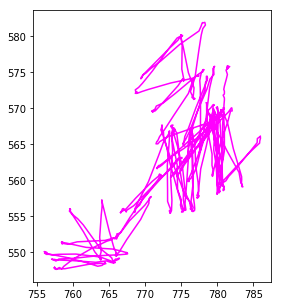

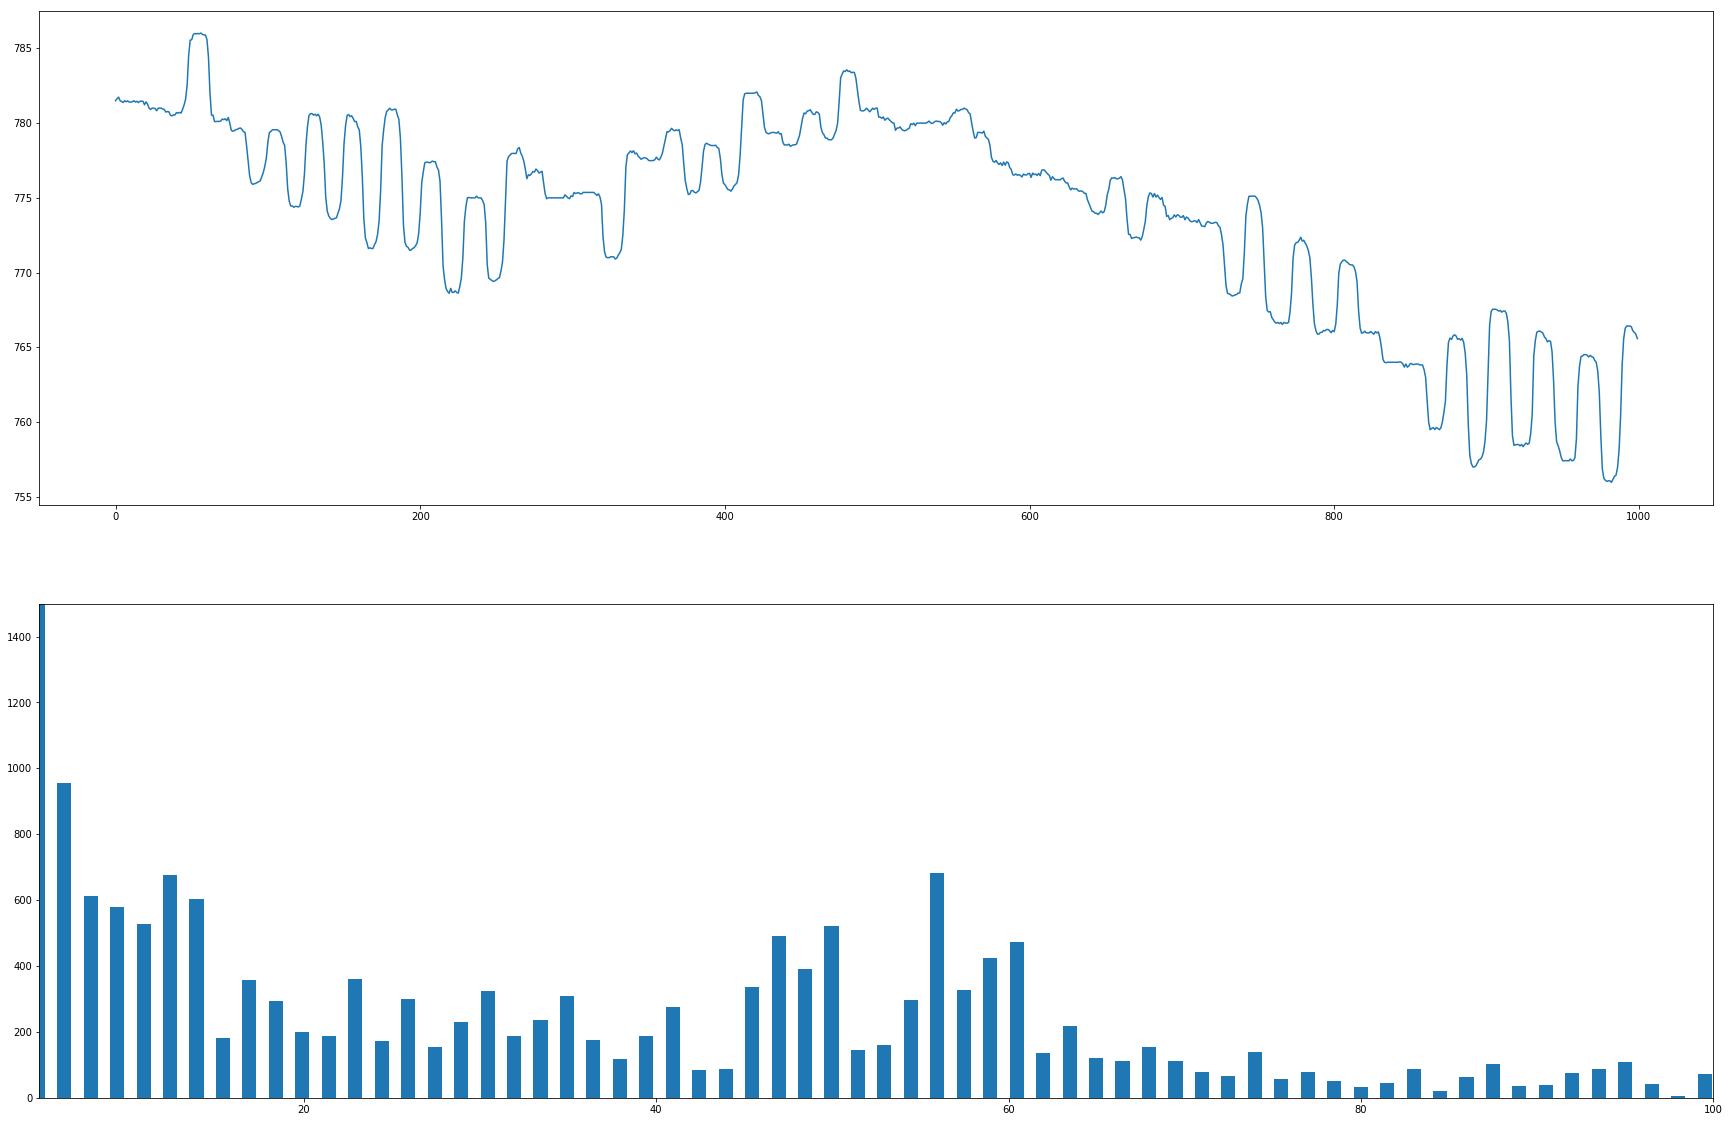

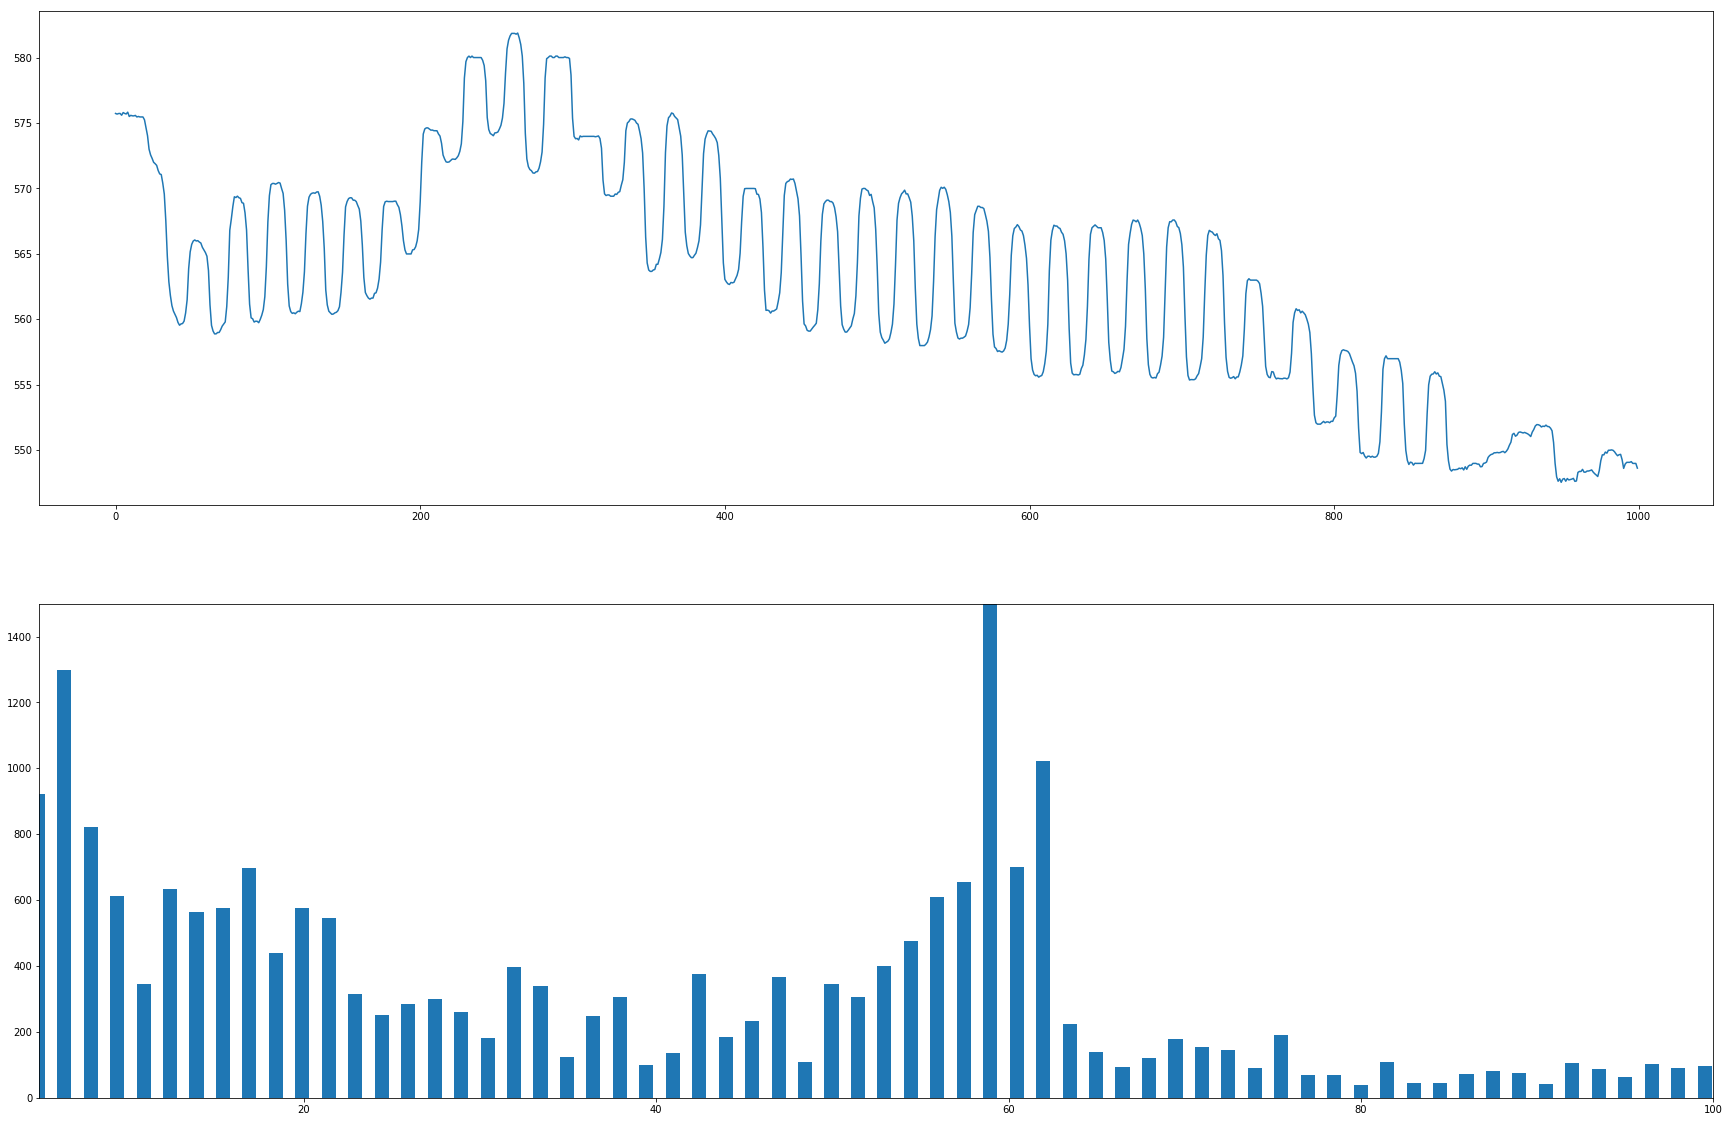

In [21]:
fre(0)

In [23]:
pplist=[]
for i in plist:
    xmax=max(t1[t1['particle']==i]['x'].values)
    xmin=min(t1[t1['particle']==i]['x'].values)
    ymax=max(t1[t1['particle']==i]['x'].values)
    ymin=min(t1[t1['particle']==i]['x'].values)
    
    if (xmax-xmin)<30 and (ymax-ymin)<30:
        pplist.append(i)
print(pplist)

len(pplist)

[2, 387, 7, 12, 13, 15, 401, 18, 275, 20, 407, 27, 31, 32, 176, 35, 36, 37, 38, 39, 40, 42, 44, 45, 46, 48, 50, 51, 52, 53, 202, 60, 61, 62, 63, 64, 66, 68, 71, 329, 74, 76, 78, 79, 81, 82, 469, 95, 165, 98, 372, 322]


52

In [27]:
def fre2(num):
    
    xmean=float(sum(t1[t1['particle']==num]['x'].values))/max(len(t1[t1['particle']==num]['x'].values),1)
    ymean=float(sum(t1[t1['particle']==num]['y'].values))/max(len(t1[t1['particle']==num]['y'].values),1)
    
    ds=[]
    for i in (t1[t1['particle']==num]['frame'].values):
        ds.append(((t1[(t1['frame']==i)&(t1['particle']==num)]['x'].values)[0]-xmean)**2+((t1[(t1['frame']==i)&(t1['particle']==num)]['x'].values)[0]-ymean)**2)
    
    ftx=np.fft.fft(t1[t1['particle']==num]['x'].values)
    fty=np.fft.fft(t1[t1['particle']==num]['y'].values)
    ftds=np.fft.fft(ds)
    ftf=np.linspace(0,fps,leg)
    
    ftx1=np.ndarray.tolist(np.abs(ftx))
    ftx2=np.ndarray.tolist(np.abs(ftx))
    largestN = []
    largep=[]
    largefx=[]
    
    for i in range(0, 2):  
        max1 = 0
          
        for j in range(5,150):      
            if ftx1[j] > max1: 
                max1 = ftx1[j] 
                  
        ftx1.remove(max1)
        largestN.append(max1)


    for i in range(len(largestN)):
        largep.append(ftx2.index(largestN[i]))

    for i in range(len(largep)):
        largefx.append(ftf[largep[i]])
    print(largefx)
    

    fty1=np.ndarray.tolist(np.abs(fty))
    fty2=np.ndarray.tolist(np.abs(fty))
    largestNy = []
    largepy=[]
    largefy=[]
    for i in range(0, 2):  
        max1 = 0
          
        for j in range(5,150):      
            if fty1[j] > max1: 
                max1 = fty1[j] 
                  
        fty1.remove(max1)
        largestNy.append(max1)

    for i in range(len(largestNy)):
        largepy.append(fty2.index(largestNy[i]))

    for i in range(len(largepy)):
        largefy.append(ftf[largepy[i]])
    print(largefy)
    
def fre3(num):
    
    xmean=float(sum(t1[t1['particle']==num]['x'].values))/max(len(t1[t1['particle']==num]['x'].values),1)
    ymean=float(sum(t1[t1['particle']==num]['y'].values))/max(len(t1[t1['particle']==num]['y'].values),1)
    
    ds=[]
    for i in (t1[t1['particle']==num]['frame'].values):
        ds.append(((t1[(t1['frame']==i)&(t1['particle']==num)]['x'].values)[0]-xmean)**2+((t1[(t1['frame']==i)&(t1['particle']==num)]['x'].values)[0]-ymean)**2)
    
    ftx=np.fft.fft(t1[t1['particle']==num]['x'].values)
    fty=np.fft.fft(t1[t1['particle']==num]['y'].values)
    ftds=np.fft.fft(ds)
    ftf=np.linspace(0,fps,leg)
    
    ftx1=np.ndarray.tolist(np.abs(ftx))
    ftx2=np.ndarray.tolist(np.abs(ftx))
    largestN = []
    largep=[]
    largefx=[]
    
    for i in range(0, 2):  
        max1 = 0
          
        for j in range(5,150):      
            if ftx1[j] > max1: 
                max1 = ftx1[j] 
                  
        ftx1.remove(max1)
        largestN.append(max1)


    for i in range(len(largestN)):
        largep.append(ftx2.index(largestN[i]))

    for i in range(len(largep)):
        largefx.append(ftf[largep[i]])
    largefx.append(num)
    return(largefx)
        

In [32]:
for i in pplist:
    print("particle number:",i)
    fre2(i)

particle number: 1
[60.120240480961925, 63.126252505010015]
[60.120240480961925, 54.108216432865731]
particle number: 2
[57.114228456913828, 66.132264529058119]
[54.108216432865731, 48.096192384769537]
particle number: 3
[63.126252505010015, 60.120240480961925]
[63.126252505010015, 66.132264529058119]
particle number: 7
[120.24048096192385, 309.61923847695391]
[135.27054108216433, 120.24048096192385]
particle number: 9
[63.126252505010015, 60.120240480961925]
[60.120240480961925, 66.132264529058119]
particle number: 10
[60.120240480961925, 36.072144288577149]
[60.120240480961925, 63.126252505010015]
particle number: 15
[60.120240480961925, 63.126252505010015]
[60.120240480961925, 63.126252505010015]
particle number: 18
[66.132264529058119, 60.120240480961925]
[63.126252505010015, 66.132264529058119]
particle number: 19
[63.126252505010015, 57.114228456913828]
[60.120240480961925, 63.126252505010015]
particle number: 20
[66.132264529058119, 63.126252505010015]
[63.126252505010015, 66.13

[66.132264529058119, 63.126252505010015]
[66.132264529058119, 63.126252505010015]
particle number: 176
[63.126252505010015, 60.120240480961925]
[60.120240480961925, 66.132264529058119]
particle number: 223
[60.120240480961925, 57.114228456913828]
[63.126252505010015, 54.108216432865731]
particle number: 229
[66.132264529058119, 69.138276553106209]
[66.132264529058119, 69.138276553106209]
particle number: 230
[60.120240480961925, 57.114228456913828]
[60.120240480961925, 63.126252505010015]
particle number: 262
[57.114228456913828, 54.108216432865731]
[54.108216432865731, 57.114228456913828]


In [26]:
report=[]
for i in pplist:
    report.append(fre3(i))

In [28]:
path2=path.replace('.mov','-fre.txt')
np.savetxt(path2,report,fmt=str('% 10.5f'))